# **DATA_ENG 300 HOMEWORK 1**

In [2]:
import pandas as pd
inventory = pd.read_csv('T_F41SCHEDULE_B43.zip')
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

<ipython-input-2-217f8892c2af>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('T_F41SCHEDULE_B43.zip')


# **Question 1**

**Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible. Give your reasoning and code if you decide to impute missing values.
Columns for investigation: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, and AIRLINE_ID.
For example, watch out for "North American Airlines" aircrafts. Are the CARRIER/UNIQUE_CARRIER column really missing?**


In [3]:
inventory_cleaned = inventory.copy()

# *Carrier*

In [4]:
# returning rows with NA from CARRIER column
has_na = inventory[inventory['CARRIER'].isna()]
has_na

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11776,2007,NaN,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING,NaN,B767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
11777,2007,NaN,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING,NaN,B757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
11778,2007,NaN,North American Airlines,1996.0,North American Airlines,28039,N769NA,B,Y,268.0,BOEING,NaN,B767-3,100500.0,2/19/2007 12:00:00 AM,20415.0,NaN
11779,2007,NaN,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING,NaN,B767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
11780,2007,NaN,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING,NaN,B757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN
11781,2007,NaN,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING,NaN,B757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NaN
11782,2007,NaN,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING,NaN,B757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NaN
11783,2007,NaN,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING,NaN,B757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NaN
11784,2007,NaN,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING,NaN,B767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NaN
11785,2007,NaN,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING,NaN,B767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NaN


In [5]:
inventory[inventory['CARRIER'].isna()]['CARRIER'].unique()


array([nan], dtype=object)

In [6]:
inventory[inventory['CARRIER'].isnull()]['CARRIER_NAME'].unique()

array(['North American Airlines'], dtype=object)

We can see that all the rows with a missing entry under the CARRIER column is under North American Airlines. Because NA is the respective CARRIER for North American Airlines, we can manually impute this into the data.

In [7]:
inventory_cleaned['CARRIER'] = inventory_cleaned['CARRIER'].fillna('NA')

# *CARRIER_NAME*

In [8]:
# returning rows with NA from CARRIER_NAME column
has_na = inventory[inventory['CARRIER_NAME'].isna()]
has_na

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,NaN,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,NaN,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,NaN,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,NaN,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,NaN,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,NaN,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,NaN,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,NaN,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,NaN,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


In [9]:
inventory[inventory['CARRIER_NAME'].isna()]['CARRIER'].unique()

array(['L4', 'OH'], dtype=object)

In [10]:
# for L4 CARRIER
inventory[inventory['CARRIER']=='L4']['CARRIER_NAME'].unique()

array([nan, 'Lynx Aviation d/b/a Frontier Airlines'], dtype=object)

Because Lynx Aviation d/b/a Frontier Airline is the only CARRIER_NAME that shows up for the CARRIER L4, we can manually impute any missing entries under CARRIER that have a Lynx Aviation d/b/a Frontier Airline CARRIER_NAME.

In [11]:
inventory_cleaned.loc[(inventory_cleaned['CARRIER'] == "L4") & (inventory_cleaned['CARRIER_NAME'].isna()),'CARRIER_NAME'] = 'Lynx Aviation d/b/a Frontier Airlines'


In [12]:
inventory_cleaned[inventory_cleaned['CARRIER']=='L4']['CARRIER_NAME'].unique()

array(['Lynx Aviation d/b/a Frontier Airlines'], dtype=object)

In [13]:
# for OH CARRIER
inventory[inventory['CARRIER']=='OH']['CARRIER_NAME'].unique()

array(['Comair Inc.', nan, 'PSA Airlines Inc.'], dtype=object)

In [14]:
inventory[inventory['CARRIER']=='OH'][inventory['CARRIER_NAME']=='PSA Airlines Inc.']

<ipython-input-14-adf0b84d9bc6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  inventory[inventory['CARRIER']=='OH'][inventory['CARRIER_NAME']=='PSA Airlines Inc.']


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
68915,2015,OH,PSA Airlines Inc.,2001.0,PSA Airlines Inc.,10018,N502AE,b,Y,70.0,GE,6311,CRJ701,67000.0,11/2/2015 12:00:00 AM,20397.0,OH
68916,2015,OH,PSA Airlines Inc.,2001.0,PSA Airlines Inc.,10025,N500AE,b,Y,70.0,GE,6311,CRJ701,67000.0,8/22/2015 12:00:00 AM,20397.0,OH
68917,2015,OH,PSA Airlines Inc.,2002.0,PSA Airlines Inc.,10021,N503AE,b,Y,70.0,GE,6311,CRJ701,67000.0,8/31/2015 12:00:00 AM,20397.0,OH
68918,2015,OH,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,10078,N509AE,b,Y,70.0,GE,6311,CRJ701,67000.0,6/14/2015 12:00:00 AM,20397.0,OH
68919,2015,OH,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,10105,N510AE,b,Y,70.0,GE,6311,CRJ701,67000.0,7/28/2015 12:00:00 AM,20397.0,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129269,2023,OH,PSA Airlines Inc.,2019.0,PSA Airlines Inc.,15476,N610NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,11/21/2019 12:00:00 AM,20397.0,OH
129270,2023,OH,PSA Airlines Inc.,2019.0,PSA Airlines Inc.,15477,N612NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,12/5/2019 12:00:00 AM,20397.0,OH
129271,2023,OH,PSA Airlines Inc.,2020.0,PSA Airlines Inc.,15481,N613NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,2/20/2020 12:00:00 AM,20397.0,OH
129272,2023,OH,PSA Airlines Inc.,2020.0,PSA Airlines Inc.,15483,N614NN,b,Y,90.0,GE,6381,CL-600-2D24,75100.0,3/12/2020 12:00:00 AM,20397.0,OH


In [15]:
inventory[(inventory['CARRIER'] == 'OH') &
    (inventory['CARRIER_NAME'] == 'Comair Inc.')]['YEAR'].unique()


array([2006, 2007, 2008, 2010, 2011])

In [16]:
inventory[(inventory['CARRIER'] == 'OH') &
    (inventory['CARRIER_NAME'] == 'PSA Airlines Inc.')]['YEAR'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

After analyzing the data, we see that the CARRIER OH switches from Comair Inc to PSA Airlines after 2011. We can manually impute this into the data.

In [17]:
inventory_cleaned.loc[(inventory_cleaned['YEAR'] <= 2011) & (inventory_cleaned['CARRIER_NAME'].isna()),'CARRIER_NAME'] = 'Comair Inc.'
inventory_cleaned.loc[(inventory_cleaned['YEAR'] > 2011) & (inventory_cleaned['CARRIER_NAME'].isna()),'CARRIER_NAME'] = 'PSA Airlines Inc.'

# *MANUFACTURE_YEAR*

In [18]:
# returning rows with NA from MANUFACTURE_YEAR column
has_na = inventory[inventory['MANUFACTURE_YEAR'].isna()]
has_na

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,0.0,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,18055.0,NaN,20363.0,9E


For MANUFACTURE_YEAR, it is not possible to accurately impute any missing values because there is no one-to-one correspondance with any specific columns nor set of columns.

# *NUMBER_OF_SEATS*

In [19]:
# returning rows with NA from NUMBER_OF_SEATS column
has_na = inventory[inventory['NUMBER_OF_SEATS'].isna()]
has_na

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


All the missing data found under the NUMBER_OF_SEATS column are cargo planes. We can fill in these missing entries as "0" because cargo planes do not carry seats for passengers.

In [20]:
inventory_cleaned['NUMBER_OF_SEATS'] = inventory_cleaned['NUMBER_OF_SEATS'].fillna(0)

# *CAPACITY_IN_POUNDS*

In [21]:
# returning rows with NA from CAPACITY_IN_POUNDS column
has_na = inventory[inventory['CAPACITY_IN_POUNDS'].isna()]
has_na

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
78991,2017,5Y,Atlas Air Inc.,1982.0,Atlas Air Inc.,22694,N767MW,b,Y,181.0,BOEING,6251,B767-200,NaN,7/1/2013 12:00:00 AM,20007.0,5Y
79015,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37809,N643GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/17/2013 12:00:00 AM,20007.0,5Y
79016,2017,5Y,Atlas Air Inc.,2012.0,Atlas Air Inc.,37810,N644GT,b,Y,0.0,BOEING,6262,B767-300,NaN,1/22/2013 12:00:00 AM,20007.0,5Y
81902,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46601,N365FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,11/6/1997 12:00:00 AM,20107.0,FX
81903,2017,FX,Federal Express Corporation,1971.0,Federal Express Corporation,46606,N368FE,O,Y,0.0,MCDONNELLDOUGLAS,7302,DC-10-10,NaN,8/21/1997 12:00:00 AM,20107.0,FX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82456,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48791,N620FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,3/25/1999 12:00:00 AM,20107.0,FX
82457,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48792,N621FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,5/28/1999 12:00:00 AM,20107.0,FX
82458,2017,FX,Federal Express Corporation,1999.0,Federal Express Corporation,48794,N623FE,b,Y,0.0,MCDONNELLDOUGLAS,7402,MD-11,NaN,6/28/1999 12:00:00 AM,20107.0,FX
90567,2018,NK,Spirit Air Lines,2018.0,Spirit Air Lines,8658,N908NK,b,Y,182.0,AirbusIndustries,7221,A-320-PSGRneo,NaN,12/17/2018 12:00:00 AM,20416.0,NK


It is not possible to impute the exact missing values for CAPACITY_IN_POUNDS. However, one possible method is taking the mean weight of the specific model and imputting it.

In [22]:
respective_mean = inventory.groupby('AIRCRAFT_TYPE')['CAPACITY_IN_POUNDS'].mean()

inventory_cleaned['CAPACITY_IN_POUNDS'] = inventory_cleaned.apply(
    lambda row: respective_mean[row['AIRCRAFT_TYPE']]
    if pd.isna(row['CAPACITY_IN_POUNDS']) and row['AIRCRAFT_TYPE'] in respective_mean
    else row['CAPACITY_IN_POUNDS'],
    axis=1
)


# *AIRLINE_ID*

In [23]:
has_na = inventory_cleaned[inventory_cleaned['AIRLINE_ID'].isna()]
has_na

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,Lynx Aviation d/b/a Frontier Airlines,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,PSA Airlines Inc.,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,PSA Airlines Inc.,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,PSA Airlines Inc.,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,PSA Airlines Inc.,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


In [24]:
inventory_cleaned[inventory_cleaned['AIRLINE_ID'].isna()]['CARRIER_NAME'].unique()

array(['Lynx Aviation d/b/a Frontier Airlines', 'PSA Airlines Inc.'],
      dtype=object)

In [25]:
inventory_cleaned[inventory_cleaned['CARRIER_NAME']=='PSA Airlines Inc.']['AIRLINE_ID'].unique()

array([20397.,    nan])

In [26]:
inventory_cleaned[inventory_cleaned['CARRIER_NAME']=='Lynx Aviation d/b/a Frontier Airlines']['AIRLINE_ID'].unique()

array([   nan, 21217.])

Seeing that Lynx Aviation d/b/a Frontier Airlines has a unique ID of 21217  and that PSA Airlines Inc. has a unique ID of 20397, we can manually input the respective missing IDs into the data.

In [27]:
inventory_cleaned.loc[(inventory_cleaned['CARRIER_NAME']=='Lynx Aviation d/b/a Frontier Airlines') & (inventory_cleaned['AIRLINE_ID'].isna()),'AIRLINE_ID'] = 21217
inventory_cleaned.loc[(inventory_cleaned['CARRIER_NAME']=='PSA Airlines Inc.') & (inventory_cleaned['AIRLINE_ID'].isna()),'AIRLINE_ID'] = 20397

# **Question 2**

**Inspect the columns MANUFACTURER, MODEL, AIRCRAFT_STATUS, and OPERATING_STATUS. Decide, for each column, if transformation or standardization of data are required. Give your reasoning and code if you decide to transform the data.**

# *MANUFACTURER*

In [28]:
inventory_cleaned['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOEING,15922
Embraer,11508
THEBOEINGCO,9223
Bombardier,8871
Boeing,8392
...,...
BEECHHAWKER400XP,1
Dassault-Falcon-2000EXEASy,1
ISRAELAIRCRAFTINDUSTRIES,1


First, I will standardize all the data to get rid of any extra whitespace and make it all uppercase. I will also remove periods and hyphens. This will help make it easier for other transformations that need to be made.

In [29]:
# standardize data
inventory_cleaned['MANUFACTURER'] = inventory_cleaned['MANUFACTURER'].str.strip().str.upper()
inventory_cleaned['MANUFACTURER'] = inventory_cleaned['MANUFACTURER'].str.replace(r"[.-]", "", regex=True)
inventory_cleaned['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOEING,27159
EMBRAER,15554
AIRBUS,13440
BOMBARDIER,11834
THEBOEINGCO,9231
...,...
MCDONNEL,1
AMA/EXPR,1
DASSAULTFALCON2000EXEASY,1


There are different variations of the same manufacturer. I will transform these variations into a standardized version of that manufacturer to minimize overcounting the number of actual unique manufacturers.

In [30]:
import re

def standardize_manufacturer(name):
    if pd.isnull(name):
        return name

    # substituting entries with standardized versions
    name = re.sub(r'.*(BOE|757).*', 'BOEING', name)
    name = re.sub(r'.*MCD.*', 'MCDONNELL-DOUGLAS', name)
    name = re.sub(r'.*BOMB.*', 'BOMBARDIER', name)
    name = re.sub(r'.*FOKK.*', 'FOKKER', name)
    name = re.sub(r'.*BEECH.*', 'BEECHCRAFT', name)
    name = re.sub(r'.*DASS.*', 'DASSAULT', name)
    name = re.sub(r'.*(FGL|PEACH).*', 'FGLAIRCRAFT/PEACH', name)
    name = re.sub(r'.*DOUG.*', 'DOUGLAS', name)
    name = re.sub(r'.*LEAR.*', 'LEARJET', name)
    name = re.sub(r'\BSAAB AIRCRAFTt\b', 'SAAB', name)
    name = re.sub(r'\BGECOMMERCIALAVIATIONSERVICES\b', 'GE', name)
    name = re.sub(r'\BAIRBUSINDUSTRIES\b', 'AIRBUS', name)
    name = re.sub(r'\BTHEBOEINGCO\b', 'BOEING', name)

    return name

inventory_cleaned['MANUFACTURER'] = inventory_cleaned['MANUFACTURER'].apply(standardize_manufacturer)
print(inventory_cleaned['MANUFACTURER'].unique())

['CANADAIR' 'CURTISS' 'DOUGLAS' 'PIPER' 'CESSNA' 'EMBRAER' 'BOEING'
 'AIRBUS' 'FOKKER' 'ATR' 'BELL' 'FAIRCHILD' 'CONVAIR' 'LOCKHEED'
 'SAAB AIRCRAFT' 'BAE' 'BOMBARDIER' 'DEHAVILLAND' 'DASSAULT' 'BEECHCRAFT'
 'DORNIER' 'IAI' 'GULFSTREAM' 'RAYTHEON' 'CHALLENGER' 'HAWKER' 'SAAB'
 'AIRBUSINDUSTRIES' 'AIRBUSINDUSTRIE' 'LEARJET' 'GLOBALEXP' 'PILATUS'
 'GULFSTREAMAEROSPACE' 'AERO/AERI' 'AMA/EXPR' 'CONTINENTALTSIO520R'
 'CSSNACITATIONX' 'GE' 'ROLLSROYCE' 'CASA' 'AEROSPATIALE' 'CHALLENGER300'
 'CFMINTERNATIONAL' 'SAABFAIRCHILD' 'SAABSCANIA' 'ALC' 'GECAS' 'AERCAP'
 'JACKSONSQUARE' 'AVOLON' 'ICBC' 'GOAL' 'SIKORSKY' 'AGUSTAWESTLAND' 'CALC'
 'AIRBUSCOMPANY' 'RAETHEON' 'PHILIPPINEAIRLINES' 'HAMBURG/GECAS'
 'ROSSIYA/GECAS' 'VUELING/GECAS' 'VUELING/AERCAP' 'IBERIA/SMBC'
 'IBERIA/ILFC' 'AIRBLUE/AIRBUS' 'AERLINGUS/GECAS' 'CEBUPACIFIC/SMBC'
 'CEBUPACIFIC' 'KUBAN/OAKHILL' 'EASYJET/GECAS' 'EASYJET/GOAL'
 'FRONTIER/AERCAP' 'AVIANCA/ACG' 'EASYJET/FUYO' 'COBALT/ICBC'
 'EASYJET/INVESTEC' 'IBERIA/MCAP' 'ALITALI

In [31]:
inventory_cleaned['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOEING,55640
EMBRAER,15554
AIRBUS,13440
BOMBARDIER,12483
DOUGLAS,10812
...,...
SAABSCANIA,1
ROLLSROYCE,1
CSSNACITATIONX,1


# *MODEL*


In [32]:
inventory_cleaned['MODEL'].value_counts()

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
A321-231(P2F),1
777FFX,1
T210N,1


First, I will standardize all the data to get rid of any extra whitespace and make it all uppercase. I will also remove periods, hyphens, and parentheses. This will help make it easier for other transformations that need to be made.

In [33]:
# standardize data
inventory_cleaned['MODEL'] = inventory_cleaned['MODEL'].str.strip().str.upper()
inventory_cleaned['MODEL'] = inventory_cleaned['MODEL'].str.replace(r"[.\-()]", "", regex=True)
inventory_cleaned['MODEL'].value_counts()

,count
MODEL,
EMB145,3052
B7377H4,2470
B737823,2370
B7572,2369
A320232,2333
...,...
LEAR58,1
757260PF,1
75727B,1


In [34]:
unique_models = inventory_cleaned['MODEL'].unique()
for model in unique_models:
    print(model)

CRJ2/4
RJ700
COMMANDO
DC6A
DC6B
PA28
CE340
EMB120
CE208B
B727100
DC871
DC873F
B7471
B7472/3
B7272
B7572
MD11
B7673
A3006
B7474
DC862
DC873
DC872
MD80
B7672
FOKKR100
B7378
B7772
DC930
DC86F
DC940
A319
DC915F
B7372C
B7371/2
B7377
B7374
B7379
EMB145
A3201/2
EMB190
B7373
B7375
B7377/L
EMB135
B7674
B7573
ATR72
MD90
B206A
A3001/2
A318
B7172
B7271
FH227
DC101
DC103
A3102CF
A3103
ATR42
MD87
CV580
DC104
DC10F
L382B
SF340/A
EMB140
JETSTM31
A321
DC910
B7474F
DC950
A3303
A3302
RJ100/ER
CRJ900
DHC8200
DASH8Q4
CE206/7
L1011
FALCON
DASH81
EMB170
B7672/R
BE1900
DO228
DO328
WESTWIND
V/GV
601
GIV
800XP
CITATION
604/605
PREMIER
BD700
G200
G450
G150
RJ200
C46/20T
CHEROKEE
C340/335
C208
A300600
RJ900
SF340
B1900
DHC8400
DC/MD80
FOKR 100
A3191
B767400
B7377L
A300X4
A3181
A310300
L382/B
JETST 31
B747F
A330300
A330200
L10030
STATIONR
B7672PSGR
B737300PSGR
DO228PSGR
DO328PSGR
B737400PSGR
B7672RPSGR
WESTWINDI
III
6011A
IV
IVSP
CITATIONBRAVO
BBJ7377EG
604
550
PREMIERI
GLOBALEXPRESS
200
450
150
850XP
CRJ200
CRJ70

There are different variations of the same model. I will transform these variations into a standardized version of that model to minimize overcounting the number of actual unique models. I will also remove extra words from the model that are not necessary for classification (e.g. passenger, only).

In [35]:
def standardize_model(model):
    if pd.isnull(model):
        return model
    model = str(model)

    # boeing model prefixes
    model = re.sub(r'\bB727(.*)', r'B727\1', model)
    model = re.sub(r'\bB737(.*)', r'B737\1', model)
    model = re.sub(r'\bB747(.*)', r'B747\1', model)
    model = re.sub(r'\bB757(.*)', r'B757\1', model)
    model = re.sub(r'\bB767(.*)', r'B767\1', model)
    model = re.sub(r'\bB777(.*)', r'B777\1', model)
    model = re.sub(r'\bB732(.*)', r'B732\1', model)
    model = re.sub(r'\bBOEINGB(.*)', r'B\1', model)
    model = re.sub(r'\bBOEING(.*)', r'B\1', model)

    # RJ and MD
    model = re.sub(r'^RJ(.*)', r'CRJ\1', model)
    model = re.sub(r'^MD(.*)', r'MD\1', model)
    model = re.sub(r'DC9(.*)', r'DC9\1', model)

    # gulfstream
    model = re.sub(r'\bGV\b', 'GIV', model)
    model = re.sub(r'^GVI(.*)', r'GVI\1', model)

    # specific cleanups
    model = re.sub(r'FANJETFALCONSERD', 'FANJETFALCON', model)
    model = re.sub(r'EMB(.*)', r'EMB\1', model)
    model = re.sub(r'CHALLENGER(.*)', r'CHAL\1', model)

    # remove generic passengerdescriptors
    for term in ['PASSENGER', 'ER', 'PSGR', 'COMBI', 'ALLPAX', 'PAX', 'ONLY', 'PASS']:
        model = model.replace(term, '')

    # hard-coded replacements
    model = model.replace('SF340', 'SF340A')
    model = model.replace('L382B', 'L382B')
    model = model.replace('FALCON20D', 'F20D')
    model = model.replace('EMB120ER', 'EMB120ER')
    model = model.replace('EMB120BJ', 'EMB120BJ')
    model = model.replace('SK76CPSGR', 'SK76C')
    model = model.replace('SK76C+', 'SK76C')
    model = model.replace('MD9030', 'MD9030')
    model = model.replace('GVIG650ER', 'GVIG650ER')
    model = model.replace('A321231PCF', 'A321231')

    return model

inventory_cleaned['MODEL'] = inventory_cleaned['MODEL'].apply(standardize_model)
inventory_cleaned['MODEL'].value_counts()

,count
MODEL,
CRJ200,3344
B737823,3326
EMB145,3064
B7377H4,2474
A320232,2463
...,...
C340/335,1
757200SIES,1
767281,1


# *AIRCRAFT_STATUS*



In [36]:
inventory_cleaned['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79487
b,30852
B,12699
a,7804
A,1330
L,122
o,19


We can transform all the entries in the AIRCRAFT_STATUS column to be all capital letters. This is the only transformation needed because there are no other types of variations between the letters.

In [37]:
inventory_cleaned['AIRCRAFT_STATUS'] = inventory['AIRCRAFT_STATUS'].str.upper()
inventory_cleaned['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79506
B,43551
A,9134
L,122


# *OPERATING_STATUS*

In [38]:
inventory_cleaned['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126577
N,5664
y,71
,1


We can transform all the entries to be capitalized. This is the only transformation that needs to be made because there are no other variations within the data. We do not know what the OPERATING_STATUS is for the empty row so we can leave it.

In [39]:
inventory_cleaned['OPERATING_STATUS'] = inventory_cleaned['OPERATING_STATUS'].str.upper()
inventory_cleaned['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126648
N,5664
,1


# *Question 3*

**Remove data rows that still have missing values. Report the amount of remaining data you obtained.**

In [40]:
inventory_cleaned.shape

(132313, 17)

In [41]:
inventory_removed = inventory_cleaned.dropna()
# removing single empty entry from OPERATING_STATUS
inventory_removed = inventory_removed[inventory_removed['OPERATING_STATUS'].str.strip() != '']
inventory_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101274 entries, 29239 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 101274 non-null  int64  
 1   CARRIER              101274 non-null  object 
 2   CARRIER_NAME         101274 non-null  object 
 3   MANUFACTURE_YEAR     101274 non-null  float64
 4   UNIQUE_CARRIER_NAME  101274 non-null  object 
 5   SERIAL_NUMBER        101274 non-null  object 
 6   TAIL_NUMBER          101274 non-null  object 
 7   AIRCRAFT_STATUS      101274 non-null  object 
 8   OPERATING_STATUS     101274 non-null  object 
 9   NUMBER_OF_SEATS      101274 non-null  float64
 10  MANUFACTURER         101274 non-null  object 
 11  AIRCRAFT_TYPE        101274 non-null  object 
 12  MODEL                101274 non-null  object 
 13  CAPACITY_IN_POUNDS   101274 non-null  float64
 14  ACQUISITION_DATE     101274 non-null  object 
 15  AIRLINE_ID        

We have 101274 non-null entries after removing all the missing values.

# *Question 4*

**Transformation and derivative variables**

**For the columns NUMBER_OF_SEATS and CAPACITY_IN_POUNDS, check the skewness in the variable and plot a histogram for each variable.**

**The Box-Cox transformation (scipy.stats.boxcox) is one possible way to transform variables into a "more-normal-like" variable. Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. XXXXXXXXX_BOXCOX.**

**Plot a histogram for each transformed variable.**

**Describe what you observe before and after transformation.**

Skewness of NUMBER_OF_SEATS: 0.3783484976888706
Skewness of CAPACITY_IN_POUNDS: 3.7609957715628384


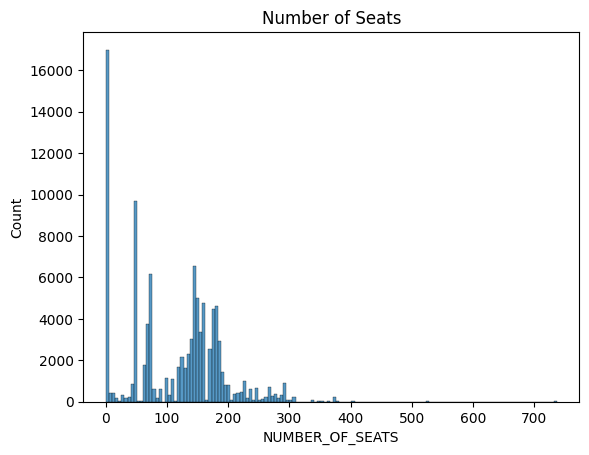

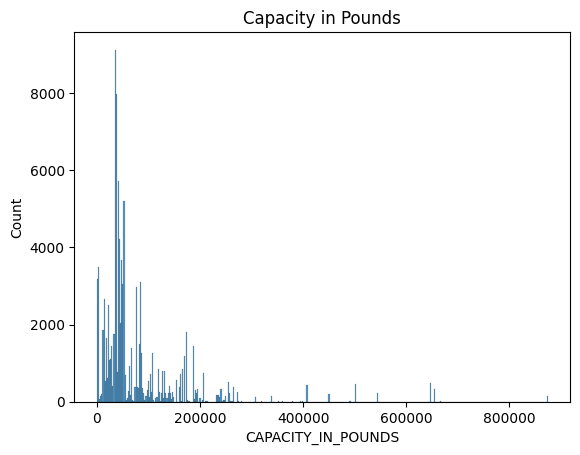

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# check skewness
skew_NUMBER_OF_SEATS = inventory_removed['NUMBER_OF_SEATS'].skew()
skew_CAPACITY_IN_POUNDS = inventory_removed['CAPACITY_IN_POUNDS'].skew()
print(f"Skewness of NUMBER_OF_SEATS: {skew_NUMBER_OF_SEATS}")
print(f"Skewness of CAPACITY_IN_POUNDS: {skew_CAPACITY_IN_POUNDS}")

# histograms of NUMBER_OF_SEATS and CAPACITY_IN_POUNDS
sns.histplot(inventory_removed['NUMBER_OF_SEATS'])
plt.title('Number of Seats')
plt.show()

sns.histplot(inventory_removed['CAPACITY_IN_POUNDS'])
plt.title('Capacity in Pounds')
plt.show()

In [44]:
from scipy.stats import boxcox

# Box-Cox transformation for NUMBER_OF_SEATS
seats_for_boxcox = inventory_removed['NUMBER_OF_SEATS'] + 1
seats_boxcox, lambda_seats = boxcox(seats_for_boxcox)
inventory_removed = inventory_removed.copy()
inventory_removed['NUMBER_OF_SEATS_BOXCOX'] = seats_boxcox


# Box-Cox transformation for CAPACITY_IN_POUNDS
capacity_for_boxcox = inventory_removed['CAPACITY_IN_POUNDS'] + 1
# apply Box-Cox transformation
capacity_boxcox, lambda_capacity = boxcox(capacity_for_boxcox)
inventory_removed = inventory_removed.copy()
inventory_removed['CAPACITY_IN_POUNDS_BOXCOX'] = capacity_boxcox

Skewness of NUMBER_OF_SEATS_BOXCOX: -0.4530972915301017
Skewness of CAPACITY_IN_POUNDS_BOXCOX: 0.19008361162027967


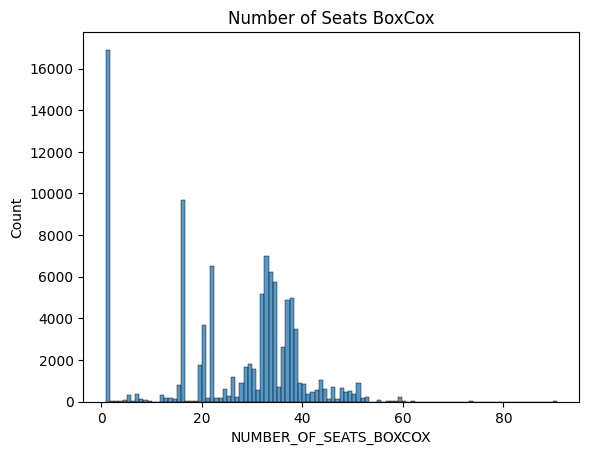

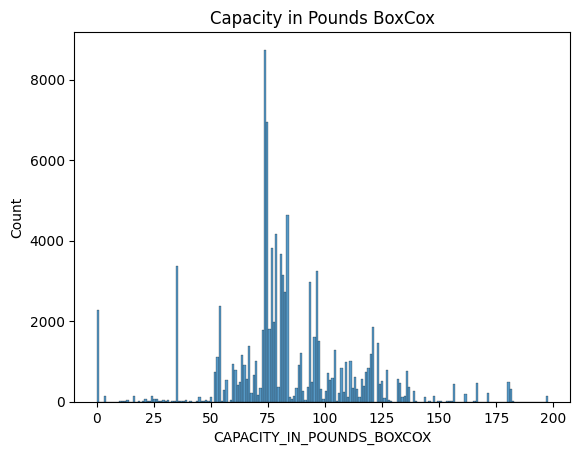

In [45]:
# check skewness
skew_NUMBER_OF_SEATS = inventory_removed['NUMBER_OF_SEATS_BOXCOX'].skew()
skew_CAPACITY_IN_POUNDS = inventory_removed['CAPACITY_IN_POUNDS_BOXCOX'].skew()
print(f"Skewness of NUMBER_OF_SEATS_BOXCOX: {skew_NUMBER_OF_SEATS}")
print(f"Skewness of CAPACITY_IN_POUNDS_BOXCOX: {skew_CAPACITY_IN_POUNDS}")

# histograms for each transformed variable
sns.histplot(inventory_removed['NUMBER_OF_SEATS_BOXCOX'])
plt.title('Number of Seats BoxCox')
plt.show()

sns.histplot(inventory_removed['CAPACITY_IN_POUNDS_BOXCOX'])
plt.title('Capacity in Pounds BoxCox')
plt.show()

Before the transformation of NUMBER_OF_SEATS, the histogram depicted a positively skewed distribution. Specifically, there was a large concentration of aircrafts with 0 seats, depicted by cargo planes. There was also a long tail extending towards the aircrafts with higher seat counts. After the Box-Cox transformation, there still is a large concentration of aircrafts with 1 seat (all entries were shifted by 1 to account for entries with 0 when performing the transformation). However, the distribution is more symmetric and bell-shaped compared to the original distribution. This can be seen from how the skew decreased from 0.3783 to -0.4531.

The original histogram of CAPACITY_IN_POUNDS also depicts a positive skew with most of the aircrafts having lower capacity and fewer aircrafts with greater capacity. After the transformation, the distribution is more symmetric and bell-shaped compared to the original distribution. There appears to be less of a skewed tail with a distribution that looks closer to normal. This can be seen from how the skew decreased from 3.7610 to 0.1901.

# **Question 5**

**Feature engineering Create a new column SIZE by the quartiles of NUMBER_OF_SEATS below 25% percentile: SMALL 25% - 50% percentile: MEDIUM 50% - 75% percentile: LARGE above 75% percentile: XLARGE For each size group, provide and plot the proportions of aircrafts that are operating versus not (OPERATING_STATUS). For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (AIRCRAFT_STATUS). Provide a written summary of your findings**

In [46]:
# percentiles
percentiles = inventory_removed['NUMBER_OF_SEATS'].quantile([0.25, 0.5, 0.75])

bins = [-float('inf'), percentiles[0.25], percentiles[0.5], percentiles[0.75], float('inf')]
labels = ['SMALL', 'MEDIUM', 'LARGE', 'XLARGE']

# create the SIZE column
inventory_removed['SIZE'] = pd.cut(inventory_removed['NUMBER_OF_SEATS'], bins=bins, labels=labels)
inventory_removed['SIZE'].value_counts()

,count
SIZE,
SMALL,29317
LARGE,25687
XLARGE,24909
MEDIUM,21361


<ipython-input-47-0bbe1655110d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  operating_status_proportions = inventory_removed.groupby(['SIZE', 'OPERATING_STATUS']).size().unstack()


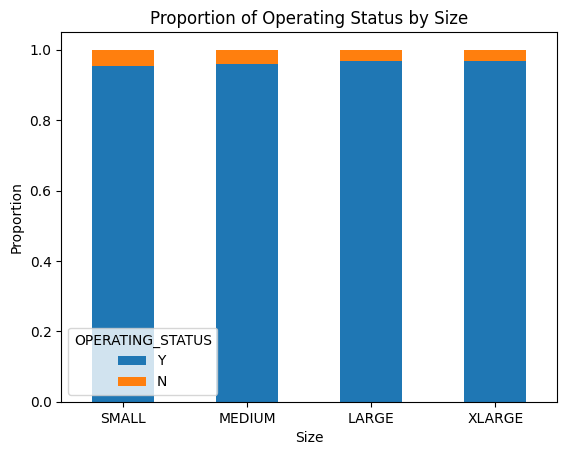

In [47]:
# proportions of OPERATING_STATUS by SIZE
operating_status_proportions = inventory_removed.groupby(['SIZE', 'OPERATING_STATUS']).size().unstack()
operating_status_proportions = operating_status_proportions.div(operating_status_proportions.sum(axis=1), axis=0)
operating_status_proportions = operating_status_proportions[['Y', 'N']]

# plot
operating_status_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Operating Status by Size')
plt.xlabel('Size')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


In [48]:
operating_status_proportions

OPERATING_STATUS,Y,N
SIZE,,
SMALL,0.953304,0.046696
MEDIUM,0.959599,0.040401
LARGE,0.967493,0.032507
XLARGE,0.968806,0.031194


<ipython-input-49-9450e0e7645b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aircraft_status_proportions = inventory_removed.groupby(['SIZE', 'AIRCRAFT_STATUS']).size().unstack().fillna(0)


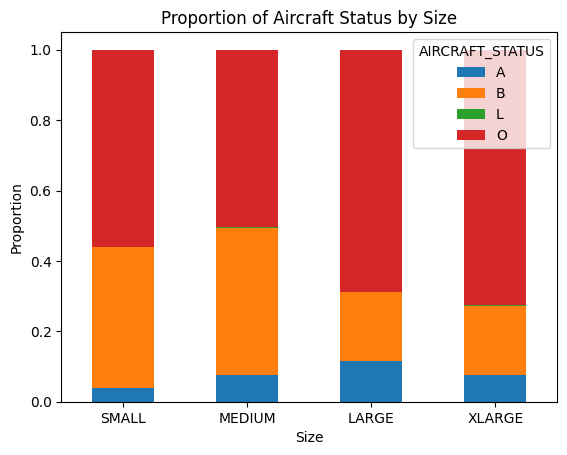

In [49]:
# proportions of AIRCRAFT_STATUS by SIZE
aircraft_status_proportions = inventory_removed.groupby(['SIZE', 'AIRCRAFT_STATUS']).size().unstack().fillna(0)
aircraft_status_proportions = aircraft_status_proportions.div(aircraft_status_proportions.sum(axis=1), axis=0)

# plot
aircraft_status_proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Aircraft Status by Size')
plt.xlabel('Size')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

In [50]:
aircraft_status_proportions

AIRCRAFT_STATUS,A,B,L,O
SIZE,,,,
SMALL,0.039329,0.398847,0.000000,0.561824
MEDIUM,0.076401,0.417115,0.001592,0.504892
LARGE,0.115545,0.195040,0.001869,0.687546
XLARGE,0.075635,0.196234,0.001606,0.726525


After dividing up the data into the four size groups using quartile-based binning, I found that the Small category had the largest number of aircrafts (29,317). This was then followed by Large (25,687), X-Large (24,909), and Medium (21,361).

When analyzing the operating status across each size group, I found that a high proportion of aircrafts were operational (OPERATING_STATUS = 'Y') across all four groups. Specifically, 95.3% of Small aircrafts were operational, 95.9% for Medium, 96.7% for Large, and 96.8% for X-Large aircrafts.

The aircraft status across the four size groups had more variation. Status A, was more common in larger aircrafts, with 3.9% in Small to 11.6% in Large. Status B was most prevalent in Small and Medium aircraft, at approximately 39.9% and 41.7% respectively, but dropped significantly in Large and X-Large categories to around 19.5%. Status L was rare in all size categories, appearing in less than 0.2% of each aircraft. Status O was highest among the largest aircraft, reaching 72.7% in the X-Large group and 68.7% in the Large group.